#install libaraies

In [1]:
!pip install pandas numpy matplotlib numpy plotly

## Install Libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.svm import SVR, SVC
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix

import xgboost as xgb
from xgboost import XGBRegressor, XGBClassifier

print("Successfully imported various machine learning models and utilities.")


Successfully imported various machine learning models and utilities.


#Load Data

In [7]:
df = pd.read_csv("/content/drive/MyDrive/PythonProjects/agriculture_supply_chain_dataset.csv")
df.head()

,Warehouse_ID,Region,Product,Stock_Level_units,Monthly_Demand_units,Delivery_Frequency_days,Lead_Time_days,Supplier_Rating,Storage_Capacity_units,Month
0,WH3,West,Maize,54,596,3,8,4,617,May
1,WH4,West,Beans,515,400,11,2,4,1312,Dec
2,WH1,East,Maize,653,690,7,1,3,660,Nov
3,WH3,North,Maize,731,460,14,2,5,900,Nov
4,WH3,West,Beans,878,338,4,1,4,697,Mar


# Task
Perform a comprehensive analysis of the agriculture supply chain dataset. This includes data preprocessing and cleaning, exploratory data analysis with modern visualizations, feature engineering, development and evaluation of machine learning models for relevant predictions (e.g., demand forecasting, stock optimization), and deriving actionable insights and recommendations. Finally Readme

## Data Preprocessing and Cleaning

### Subtask:
Perform necessary data cleaning steps such as handling missing values, addressing outliers, correcting data types, and encoding categorical features in the loaded dataset (`df`).


**Reasoning**:
The first step in data cleaning is to check for missing values to understand the extent of missingness and inform the imputation strategy.



In [8]:
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
Warehouse_ID               0
Region                     0
Product                    0
Stock_Level_units          0
Monthly_Demand_units       0
Delivery_Frequency_days    0
Lead_Time_days             0
Supplier_Rating            0
Storage_Capacity_units     0
Month                      0
dtype: int64


**Reasoning**:
Since there are no missing values, the next step in data cleaning is to identify and handle duplicate rows to ensure data integrity.



In [9]:
print(f"Number of duplicate rows before removal: {df.duplicated().sum()}")
df.drop_duplicates(inplace=True)
print(f"Number of duplicate rows after removal: {df.duplicated().sum()}")

Number of duplicate rows before removal: 0
Number of duplicate rows after removal: 0


**Reasoning**:
After handling missing values and duplicate rows, the next step is to examine the data types of each column to identify any inappropriate types that may need correction for further analysis or model building.



In [10]:
print("Data types of each column:")
print(df.info())

Data types of each column:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Warehouse_ID             400 non-null    object
 1   Region                   400 non-null    object
 2   Product                  400 non-null    object
 3   Stock_Level_units        400 non-null    int64 
 4   Monthly_Demand_units     400 non-null    int64 
 5   Delivery_Frequency_days  400 non-null    int64 
 6   Lead_Time_days           400 non-null    int64 
 7   Supplier_Rating          400 non-null    int64 
 8   Storage_Capacity_units   400 non-null    int64 
 9   Month                    400 non-null    object
dtypes: int64(6), object(4)
memory usage: 31.4+ KB
None


**Reasoning**:
After reviewing the data types, it's clear that `Warehouse_ID`, `Region`, `Product`, and `Month` are categorical columns. To decide on the most appropriate encoding technique, it's essential to examine their unique values and cardinality. This step helps understand the distribution and distinct categories within each column.



In [11]:
print("Unique values and counts for categorical columns:")
for col in ['Warehouse_ID', 'Region', 'Product', 'Month']:
    print(f"\nColumn: {col}")
    print(df[col].value_counts())


Unique values and counts for categorical columns:

Column: Warehouse_ID
Warehouse_ID
WH4    115
WH3    104
WH1     95
WH2     86
Name: count, dtype: int64

Column: Region
Region
West     112
North    104
South    101
East      83
Name: count, dtype: int64

Column: Product
Product
Maize       118
Potatoes     97
Beans        95
Sorghum      90
Name: count, dtype: int64

Column: Month
Month
Mar    41
Aug    39
Jan    38
Dec    38
Sep    37
Nov    35
Apr    33
May    32
Jun    30
Jul    29
Feb    26
Oct    22
Name: count, dtype: int64


**Reasoning**:
Given the low cardinality of the categorical features (`Warehouse_ID`, `Region`, `Product`, and `Month`) as observed in the previous step, one-hot encoding is an appropriate technique to convert them into numerical format without implying any ordinal relationship, making them suitable for machine learning models.



In [12]:
df_encoded = pd.get_dummies(df, columns=['Warehouse_ID', 'Region', 'Product', 'Month'], drop_first=False)
print("Shape of DataFrame after one-hot encoding:", df_encoded.shape)
print("First 5 rows of the encoded DataFrame:")
print(df_encoded.head())

Shape of DataFrame after one-hot encoding: (400, 30)
First 5 rows of the encoded DataFrame:
   Stock_Level_units  Monthly_Demand_units  Delivery_Frequency_days  \
0                 54                   596                        3   
1                515                   400                       11   
2                653                   690                        7   
3                731                   460                       14   
4                878                   338                        4   

   Lead_Time_days  Supplier_Rating  Storage_Capacity_units  Warehouse_ID_WH1  \
0               8                4                     617             False   
1               2                4                    1312             False   
2               1                3                     660              True   
3               2                5                     900             False   
4               1                4                     697             False   



**Reasoning**:
With categorical features now encoded, the next step in data cleaning involves analyzing numerical columns for outliers. Identifying outliers is crucial as they can skew analysis and impact machine learning model performance, thus a strategy to handle them needs to be considered.



In [13]:
numerical_cols = df_encoded.select_dtypes(include=['int64', 'float64']).columns
print("Descriptive statistics for numerical columns to identify potential outliers:")
print(df_encoded[numerical_cols].describe())

Descriptive statistics for numerical columns to identify potential outliers:
       Stock_Level_units  Monthly_Demand_units  Delivery_Frequency_days  \
count         400.000000            400.000000               400.000000   
mean          521.280000            450.375000                 7.855000   
std           283.520601            255.789053                 4.156581   
min            50.000000             33.000000                 1.000000   
25%           278.000000            211.000000                 4.000000   
50%           530.500000            450.000000                 8.000000   
75%           769.250000            677.250000                12.000000   
max           999.000000            896.000000                14.000000   

       Lead_Time_days  Supplier_Rating  Storage_Capacity_units  
count      400.000000       400.000000              400.000000  
mean         4.962500         3.107500             1032.240000  
std          2.588018         1.421617              

**Reasoning**:
To further identify potential outliers in the numerical columns, visualizing their distributions using box plots is a very effective method. This allows for a quick visual assessment of the spread and any extreme values that fall outside the typical range, informing subsequent decisions on outlier handling.



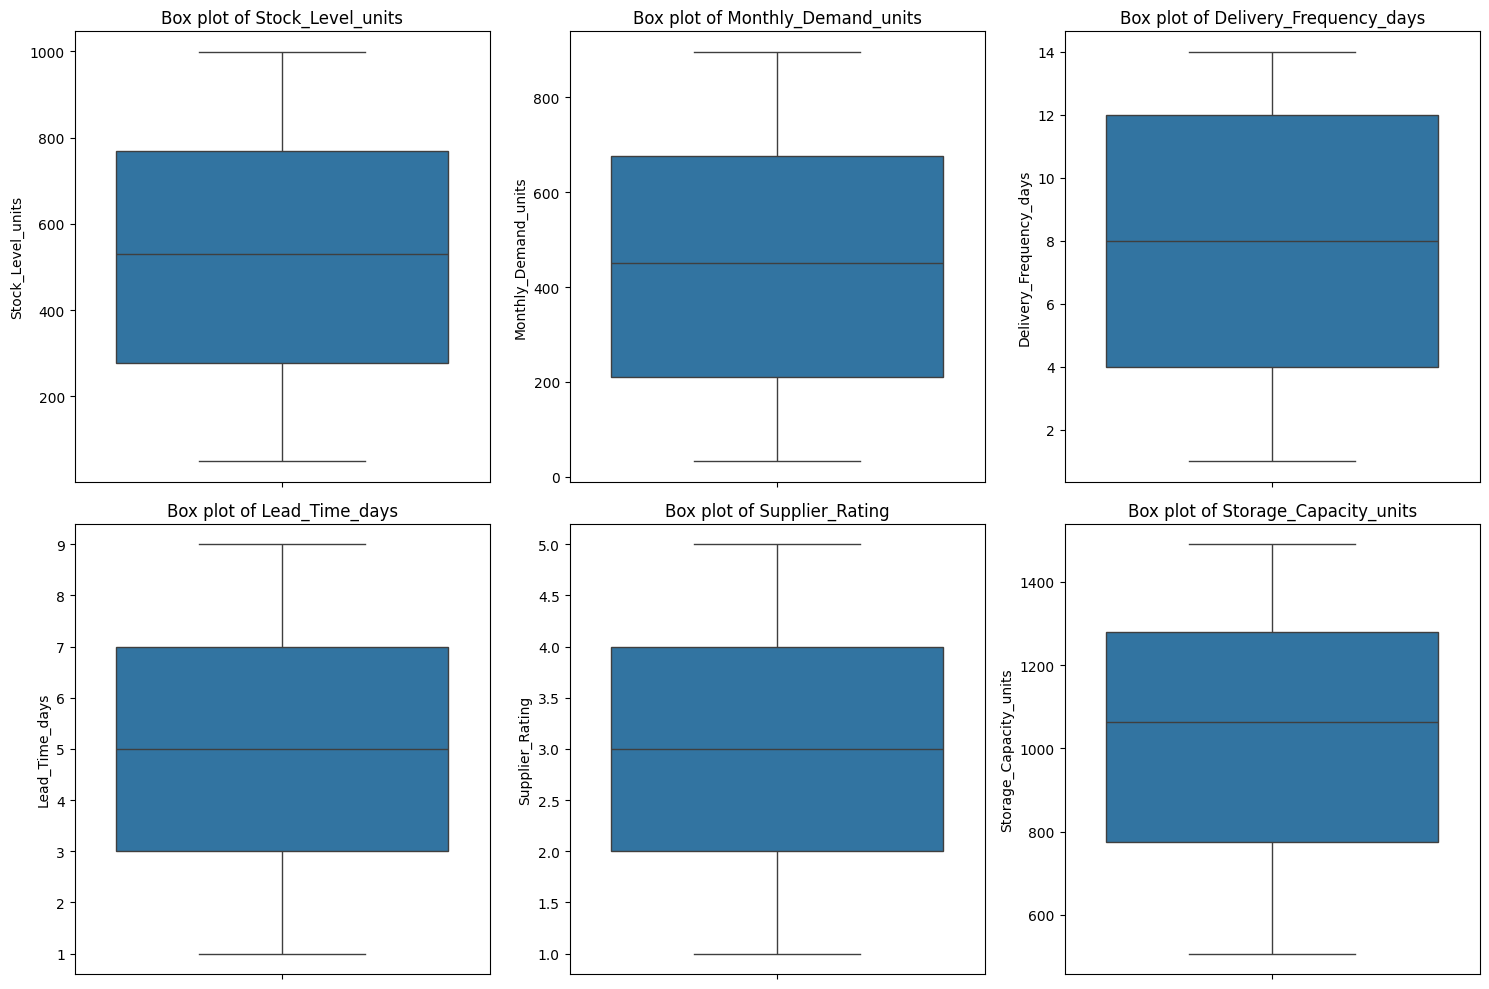

Box plots for numerical columns displayed to visualize outliers.


In [14]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1) # Adjust subplot grid as needed
    sns.boxplot(y=df_encoded[col])
    plt.title(f'Box plot of {col}')
plt.tight_layout()
plt.show()

print("Box plots for numerical columns displayed to visualize outliers.")

## Exploratory Data Analysis (EDA) with Modern Visualizations

### Subtask:
Conduct an in-depth exploratory data analysis to understand the distributions of key variables, identify correlations, and visualize patterns relevant to agriculture supply chain dynamics. Create modern, visually attractive plots (e.g., histograms, bar charts, scatter plots, box plots, heatmaps, time series plots) to extract actionable insights and effectively communicate findings, suitable for attracting recruiters.


**Reasoning**:
The first step in EDA is to understand the distribution of numerical variables. Generating histograms for all numerical columns in `df_encoded` will provide insights into their spread, central tendency, and identify any skewness or unusual patterns.



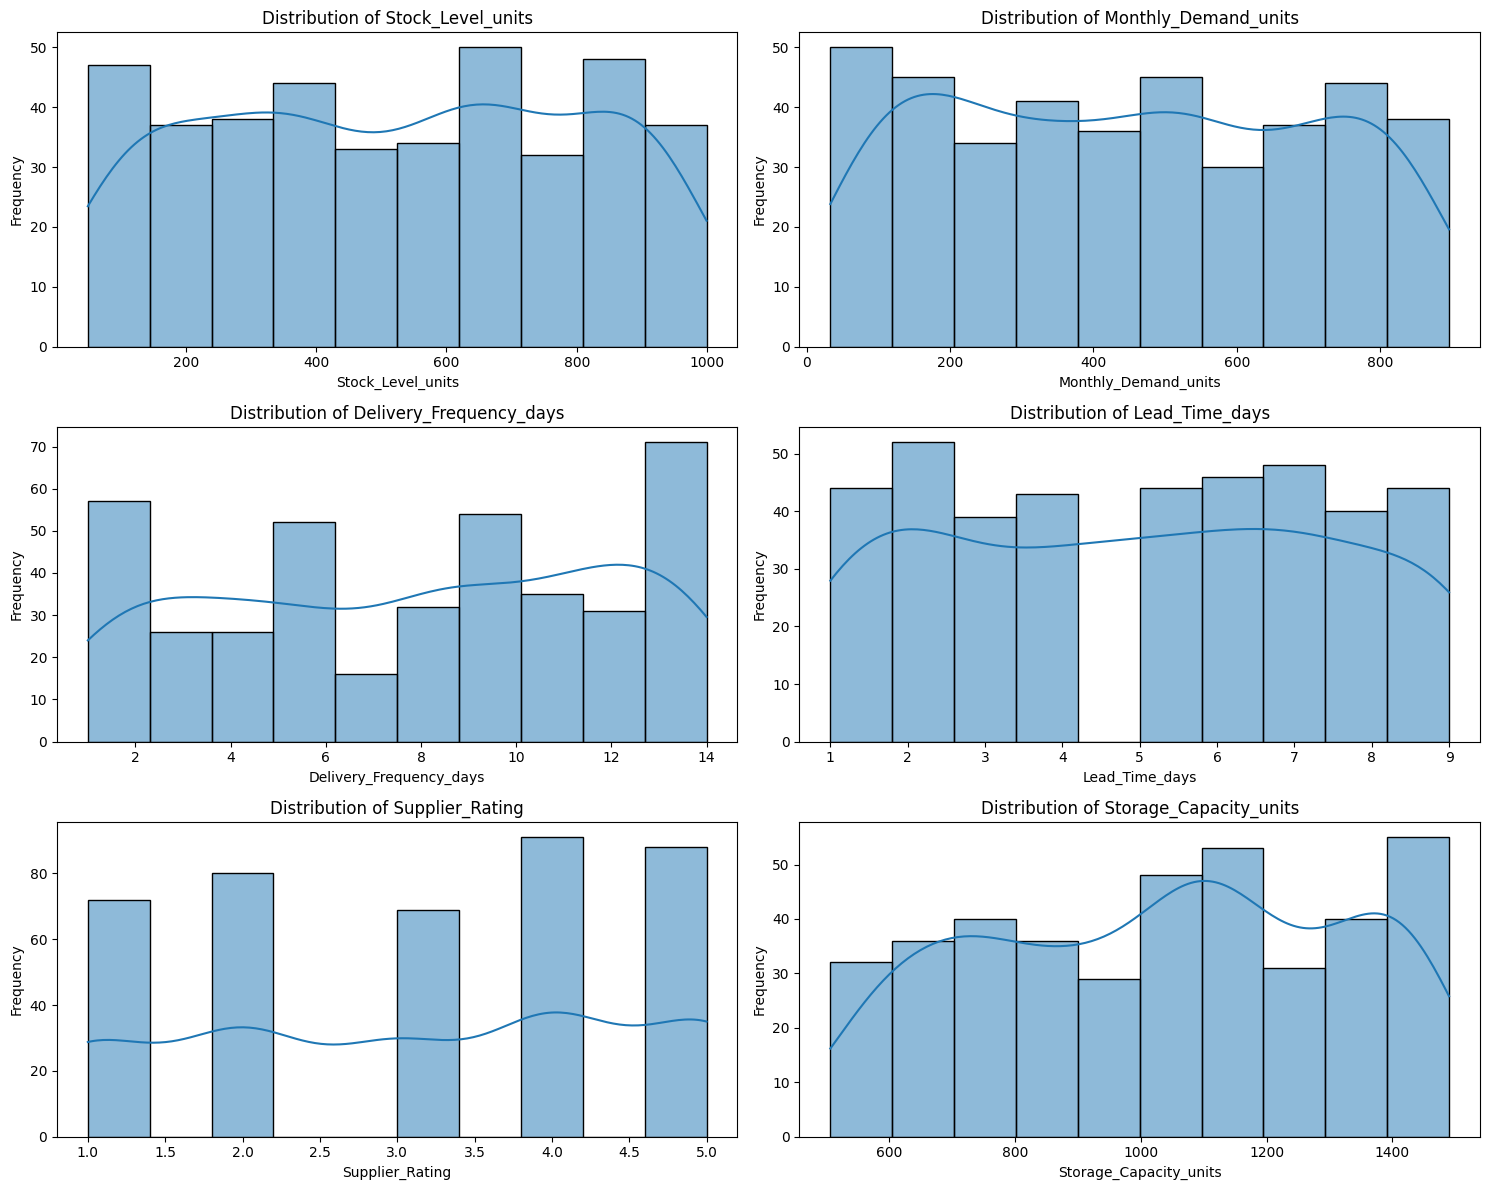

Histograms for numerical columns displayed.


In [15]:
plt.figure(figsize=(15, 12))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 2, i + 1) # Adjust subplot grid as needed
    sns.histplot(df_encoded[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

print("Histograms for numerical columns displayed.")

**Reasoning**:
To identify relationships between numerical features, creating a correlation heatmap is an effective visualization method. This will help in understanding which variables move together or in opposite directions.



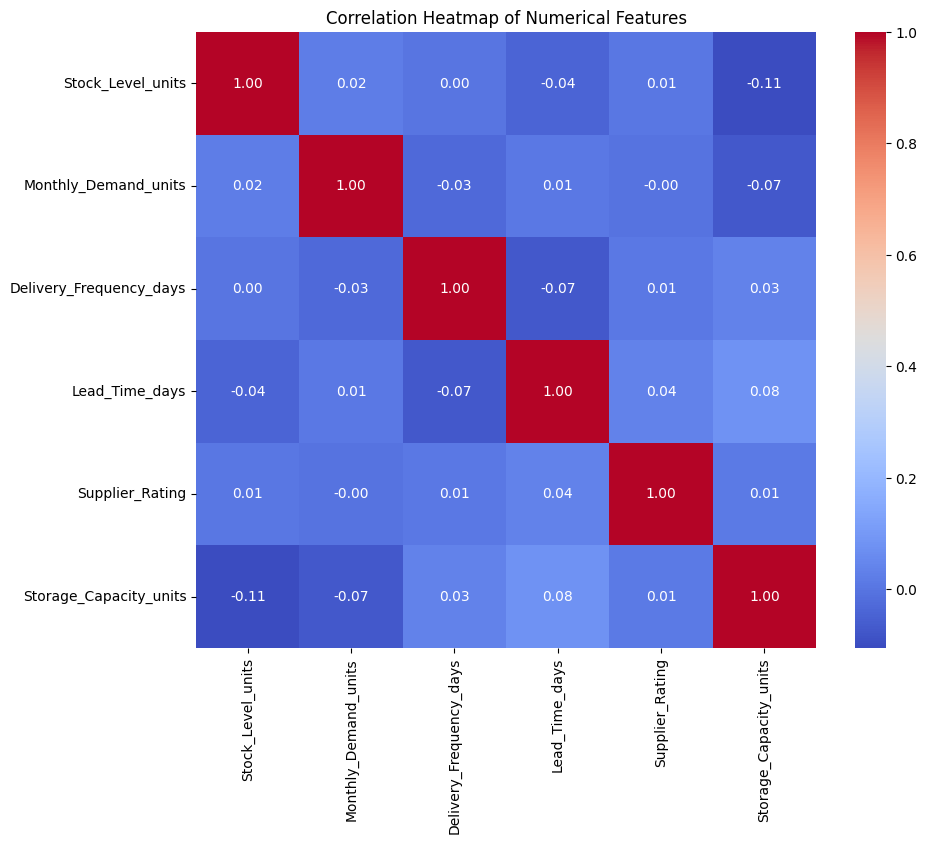

Correlation heatmap for numerical features displayed.


In [16]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_encoded[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

print("Correlation heatmap for numerical features displayed.")

**Reasoning**:
To understand the distribution and frequency of each category within the original categorical columns, bar plots are suitable. These plots will visualize the counts for 'Warehouse_ID', 'Region', 'Product', and 'Month' using the original `df` DataFrame.



/tmp/ipython-input-3041021996.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-3041021996.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-3041021996.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-3041021996.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




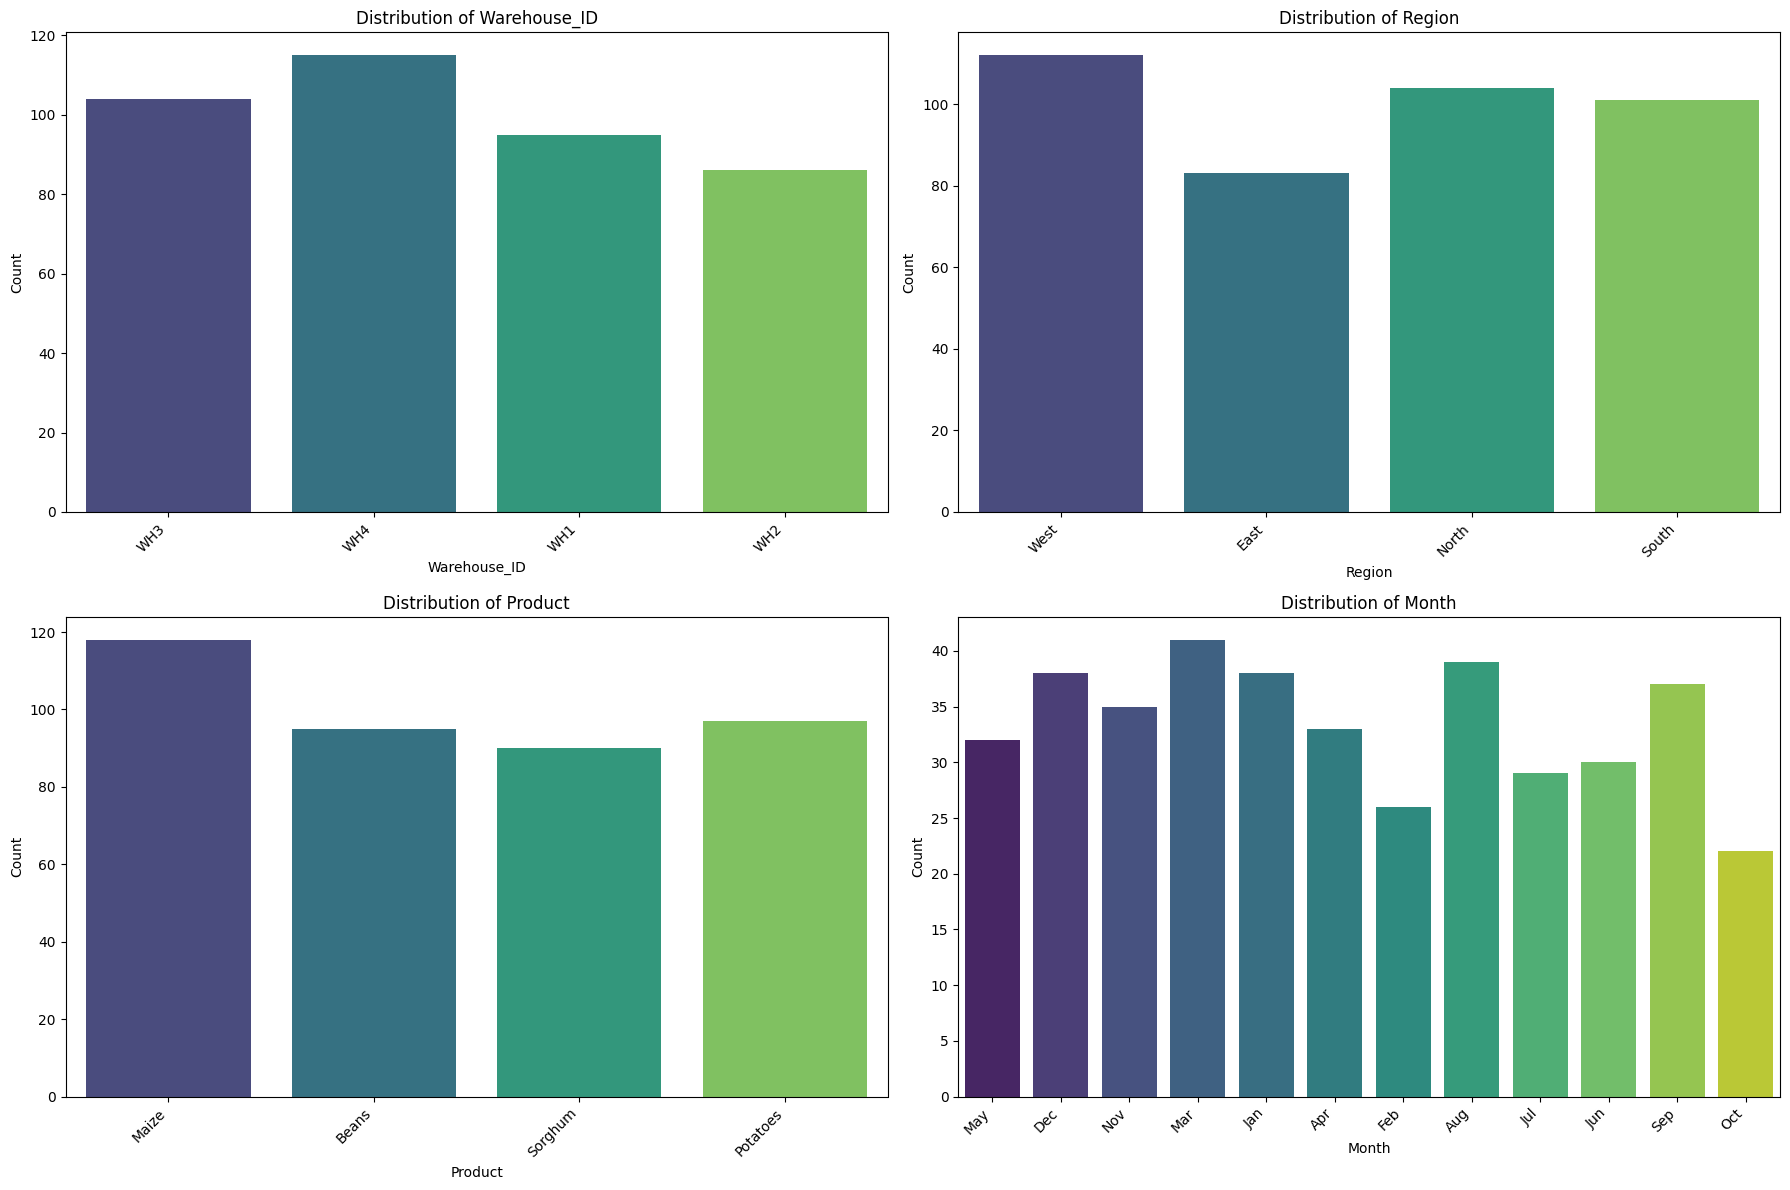

Bar plots for categorical columns displayed.


In [17]:
categorical_cols = ['Warehouse_ID', 'Region', 'Product', 'Month']

plt.figure(figsize=(18, 12))
for i, col in enumerate(categorical_cols):
    plt.subplot(2, 2, i + 1)
    sns.countplot(data=df, x=col, palette='viridis')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("Bar plots for categorical columns displayed.")

**Reasoning**:
The previous code block generated a `FutureWarning` from Seaborn regarding the use of `palette` without `hue` in `sns.countplot`. To address this, I will update the `sns.countplot` calls to explicitly set `hue=col` and `legend=False` as suggested by the warning. This will suppress the warning and ensure future compatibility while maintaining the desired visualization.



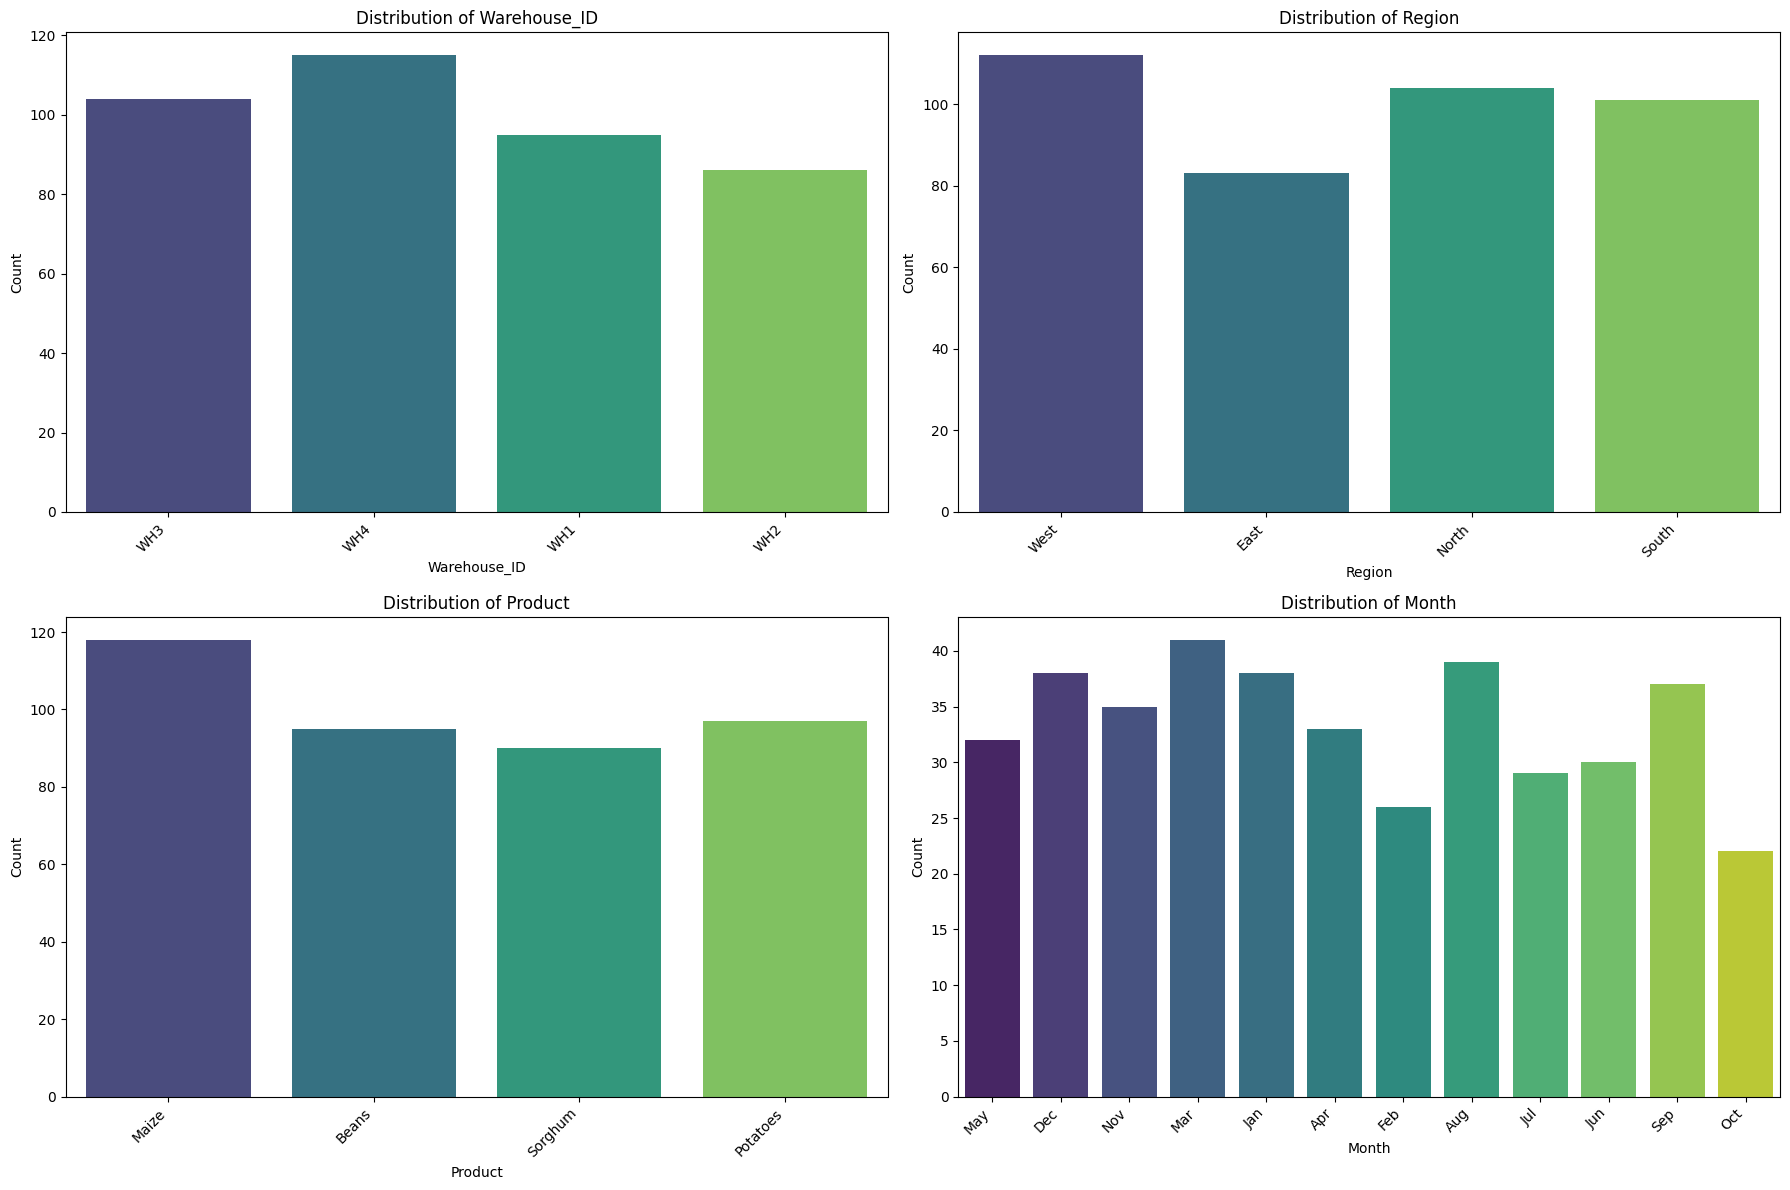

Bar plots for categorical columns displayed.


In [18]:
categorical_cols = ['Warehouse_ID', 'Region', 'Product', 'Month']

plt.figure(figsize=(18, 12))
for i, col in enumerate(categorical_cols):
    plt.subplot(2, 2, i + 1)
    sns.countplot(data=df, x=col, palette='viridis', hue=col, legend=False)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("Bar plots for categorical columns displayed.")

**Reasoning**:
To explore the relationship between monthly demand and different products, a box plot is an effective visualization. This will show the distribution of 'Monthly_Demand_units' for each 'Product' category, highlighting potential differences in demand patterns.



/tmp/ipython-input-3581538157.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




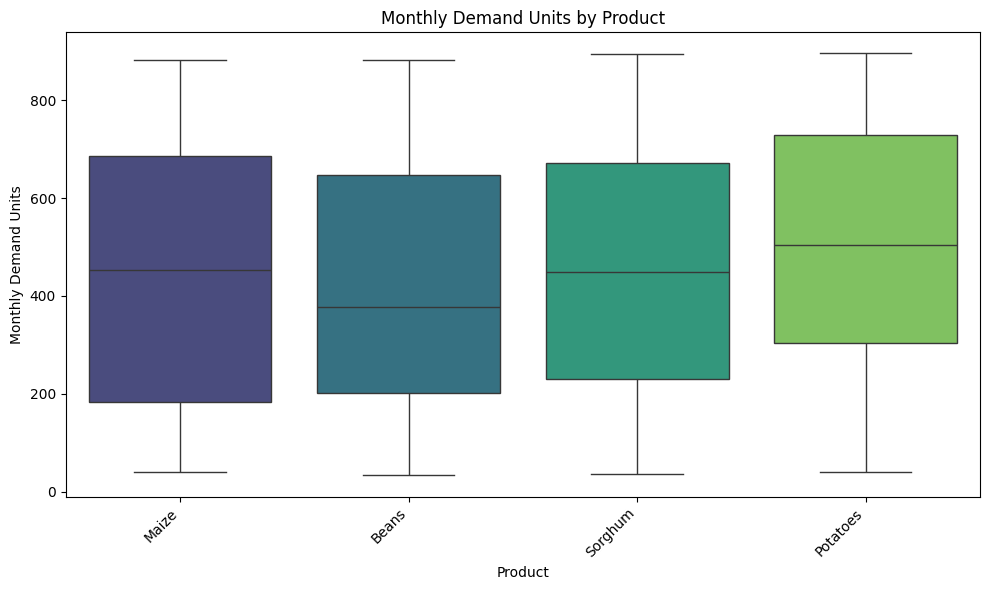

Box plot of Monthly Demand Units by Product displayed.


In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Product', y='Monthly_Demand_units', palette='viridis')
plt.title('Monthly Demand Units by Product')
plt.xlabel('Product')
plt.ylabel('Monthly Demand Units')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("Box plot of Monthly Demand Units by Product displayed.")

**Reasoning**:
The previous code block generated a `FutureWarning` from Seaborn regarding the use of `palette` without `hue` in `sns.boxplot`. To address this, I will update the `sns.boxplot` call to explicitly set `hue='Product'` and `legend=False` as suggested by the warning. This will suppress the warning and ensure future compatibility while maintaining the desired visualization.



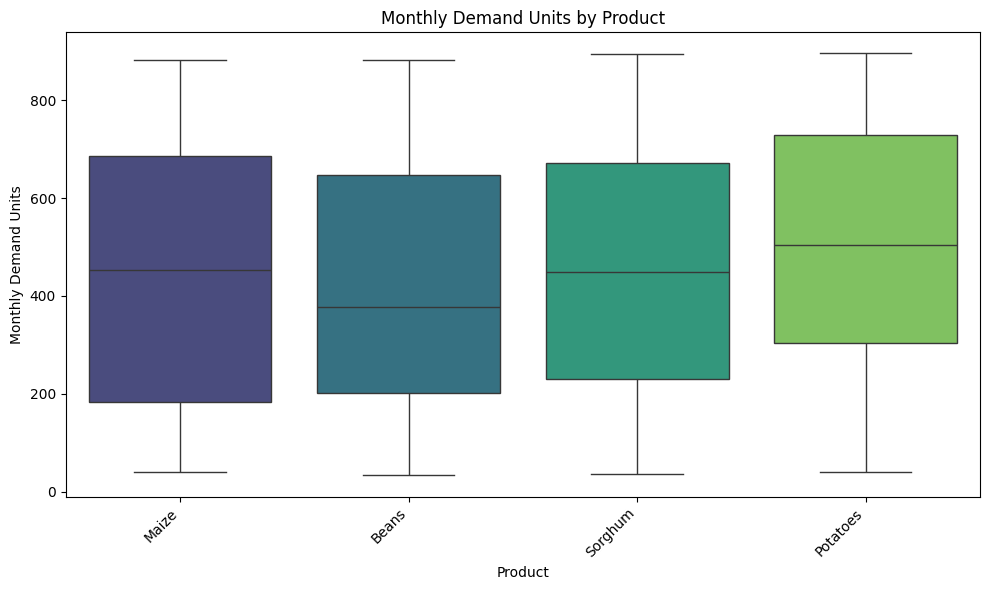

Box plot of Monthly Demand Units by Product displayed.


In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Product', y='Monthly_Demand_units', palette='viridis', hue='Product', legend=False)
plt.title('Monthly Demand Units by Product')
plt.xlabel('Product')
plt.ylabel('Monthly Demand Units')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("Box plot of Monthly Demand Units by Product displayed.")

**Reasoning**:
To investigate the relationship between 'Stock_Level_units' and 'Warehouse_ID', a box plot is an appropriate visualization. This will display the distribution of stock levels for each warehouse, helping to identify differences or patterns across warehouses.



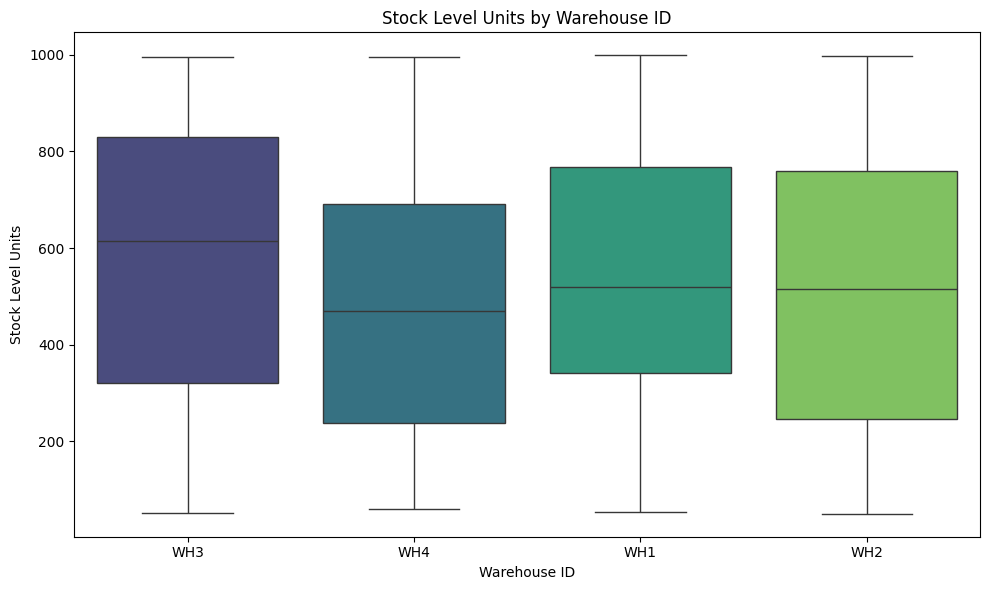

Box plot of Stock Level Units by Warehouse ID displayed.


In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Warehouse_ID', y='Stock_Level_units', palette='viridis', hue='Warehouse_ID', legend=False)
plt.title('Stock Level Units by Warehouse ID')
plt.xlabel('Warehouse ID')
plt.ylabel('Stock Level Units')
plt.tight_layout()
plt.show()

print("Box plot of Stock Level Units by Warehouse ID displayed.")

**Reasoning**:
To observe any seasonal patterns in 'Monthly_Demand_units', a line plot or bar plot against 'Month' is appropriate. It is crucial to sort the months chronologically to accurately represent seasonal trends.



/tmp/ipython-input-1307011407.py:5: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


/tmp/ipython-input-1307011407.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




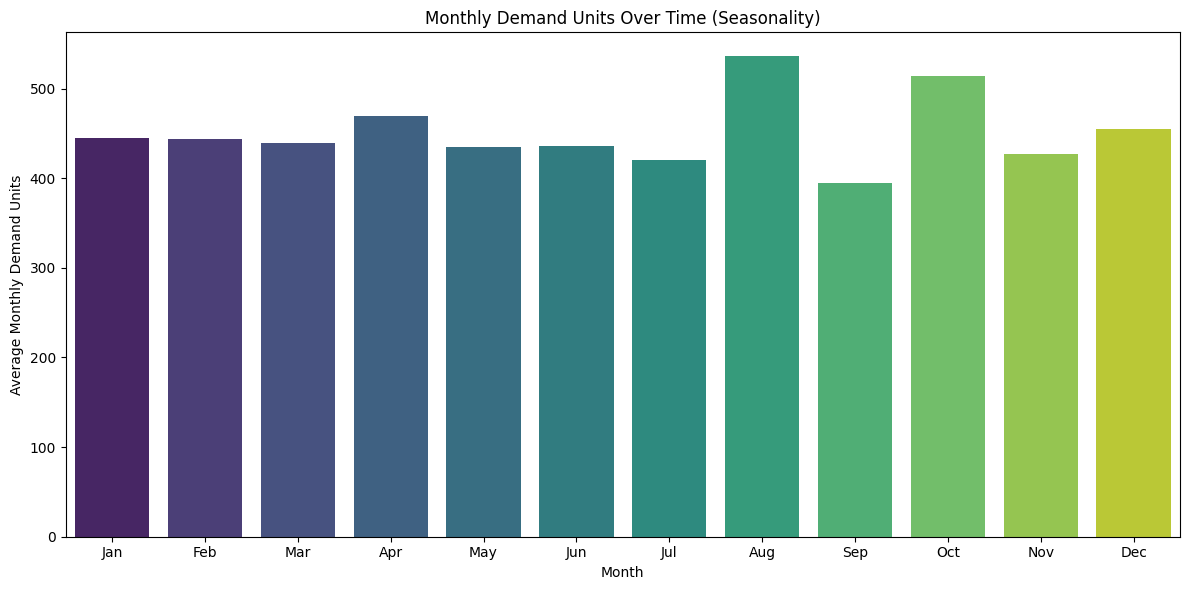

Bar plot of Average Monthly Demand Units by Month displayed.


In [22]:
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df['Month'] = pd.Categorical(df['Month'], categories=month_order, ordered=True)

plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Month', y='Monthly_Demand_units', palette='viridis', ci=None)
plt.title('Monthly Demand Units Over Time (Seasonality)')
plt.xlabel('Month')
plt.ylabel('Average Monthly Demand Units')
plt.tight_layout()
plt.show()

print("Bar plot of Average Monthly Demand Units by Month displayed.")

**Reasoning**:
The previous code block generated a `FutureWarning` from Seaborn regarding the deprecated `ci` parameter and the use of `palette` without `hue` in `sns.barplot`. To address this, I will update the `sns.barplot` call to explicitly set `errorbar=None`, `hue='Month'`, and `legend=False` as suggested by the warnings. This will suppress the warnings and ensure future compatibility while maintaining the desired visualization.



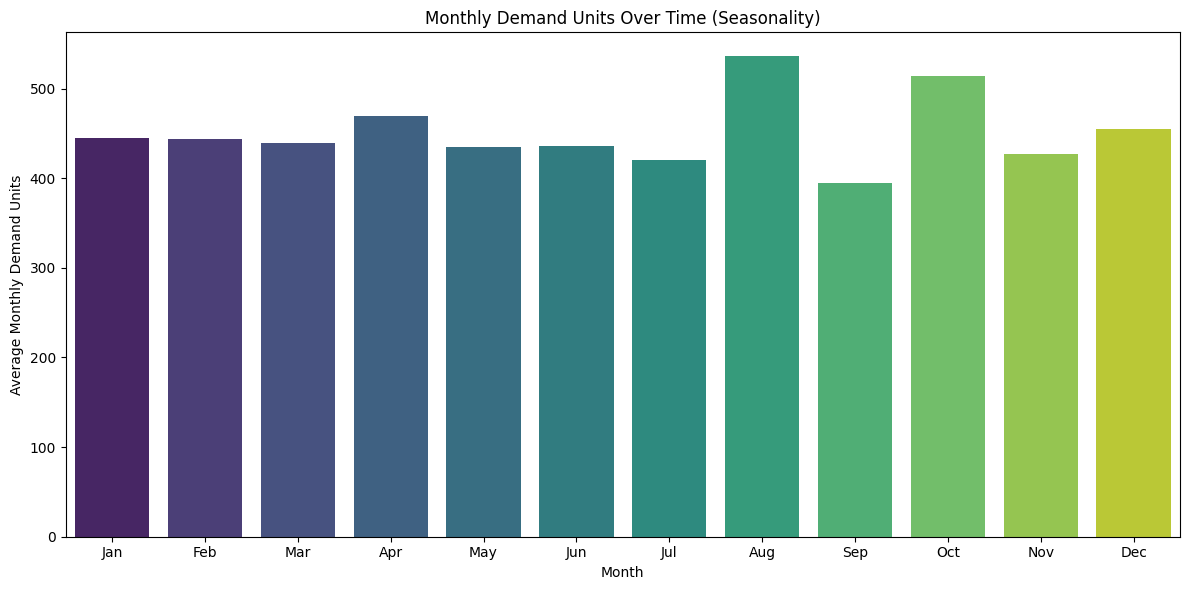

Bar plot of Average Monthly Demand Units by Month displayed.


In [23]:
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df['Month'] = pd.Categorical(df['Month'], categories=month_order, ordered=True)

plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Month', y='Monthly_Demand_units', palette='viridis', errorbar=None, hue='Month', legend=False)
plt.title('Monthly Demand Units Over Time (Seasonality)')
plt.xlabel('Month')
plt.ylabel('Average Monthly Demand Units')
plt.tight_layout()
plt.show()

print("Bar plot of Average Monthly Demand Units by Month displayed.")

## Feature Engineering

### Subtask:
Create new features from existing ones to enhance predictive power.


**Reasoning**:
To enhance predictive power, I will create new features as instructed: `Stock_to_Demand_Ratio`, `Storage_Utilization`, and `Demand_Lead_Time_Ratio` by performing arithmetic operations on existing columns in the `df_encoded` DataFrame.



In [24]:
df_encoded['Stock_to_Demand_Ratio'] = df_encoded['Stock_Level_units'] / df_encoded['Monthly_Demand_units']
df_encoded['Storage_Utilization'] = df_encoded['Stock_Level_units'] / df_encoded['Storage_Capacity_units']
df_encoded['Demand_Lead_Time_Ratio'] = df_encoded['Monthly_Demand_units'] / df_encoded['Lead_Time_days']

print("First 5 rows of the DataFrame with new features:")
print(df_encoded.head())
print(f"\nUpdated shape of the DataFrame: {df_encoded.shape}")

First 5 rows of the DataFrame with new features:
   Stock_Level_units  Monthly_Demand_units  Delivery_Frequency_days  \
0                 54                   596                        3   
1                515                   400                       11   
2                653                   690                        7   
3                731                   460                       14   
4                878                   338                        4   

   Lead_Time_days  Supplier_Rating  Storage_Capacity_units  Warehouse_ID_WH1  \
0               8                4                     617             False   
1               2                4                    1312             False   
2               1                3                     660              True   
3               2                5                     900             False   
4               1                4                     697             False   

   Warehouse_ID_WH2  Warehouse_ID_WH3  Ware

## Model Development and Training (Suited to Project)

### Subtask:
Define the target variable, split the data into training and testing sets, and train appropriate machine learning models for demand forecasting.


**Reasoning**:
The first step in model development is to clearly define the target variable and features, and then split the data into training and testing sets to prepare for model training. This follows the instructions to define `Monthly_Demand_units` as `y` and the remaining appropriate columns in `df_encoded` as `X`, followed by splitting the data.



In [25]:
y = df_encoded['Monthly_Demand_units']
X = df_encoded.drop(columns=['Monthly_Demand_units', 'Stock_to_Demand_Ratio', 'Demand_Lead_Time_Ratio'], errors='ignore')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (320, 30)
Shape of X_test: (80, 30)
Shape of y_train: (320,)
Shape of y_test: (80,)


**Reasoning**:
Following the data splitting, the next step is to initialize and train the specified regression models, `LinearRegression` and `RandomForestRegressor`, using the training data (`X_train`, `y_train`) to prepare them for demand forecasting.



In [26]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

print("LinearRegression and RandomForestRegressor models have been successfully trained.")

LinearRegression and RandomForestRegressor models have been successfully trained.


**Reasoning**:
After training the models, the next crucial step is to evaluate their performance on the test set to understand how well they generalize to unseen data. This will involve making predictions and then calculating evaluation metrics such as Mean Squared Error (MSE) and R-squared (R2 Score).



In [27]:
y_pred_lr = linear_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Linear Regression Model Performance:")
print(f"  Mean Squared Error (MSE): {mse_lr:.2f}")
print(f"  R-squared (R2 Score): {r2_lr:.2f}")

print("\nRandom Forest Regressor Model Performance:")
print(f"  Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"  R-squared (R2 Score): {r2_rf:.2f}")

Linear Regression Model Performance:
  Mean Squared Error (MSE): 79474.62
  R-squared (R2 Score): -0.08

Random Forest Regressor Model Performance:
  Mean Squared Error (MSE): 79754.87
  R-squared (R2 Score): -0.08


## Model Evaluation and Tuning (XGBoost)

### Subtask:
Train an XGBoost Regressor model and evaluate its performance, comparing it with the previously trained Linear Regression and Random Forest models.


**Reasoning**:
To address the subtask, I will initialize, train, and evaluate an `XGBRegressor` model using the `X_train` and `y_train` datasets, then make predictions on `X_test` and calculate its MSE and R2 score for comparison with the previously trained models.



In [28]:
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("XGBoost Regressor Model Performance:")
print(f"  Mean Squared Error (MSE): {mse_xgb:.2f}")
print(f"  R-squared (R2 Score): {r2_xgb:.2f}")

print("\n--- Comparison with previous models ---")
print("Linear Regression Model Performance:")
print(f"  Mean Squared Error (MSE): {mse_lr:.2f}")
print(f"  R-squared (R2 Score): {r2_lr:.2f}")

print("\nRandom Forest Regressor Model Performance:")
print(f"  Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"  R-squared (R2 Score): {r2_rf:.2f}")

XGBoost Regressor Model Performance:
  Mean Squared Error (MSE): 90817.95
  R-squared (R2 Score): -0.23

--- Comparison with previous models ---
Linear Regression Model Performance:
  Mean Squared Error (MSE): 79474.62
  R-squared (R2 Score): -0.08

Random Forest Regressor Model Performance:
  Mean Squared Error (MSE): 79754.87
  R-squared (R2 Score): -0.08


# Agriculture Supply Chain Analysis and Demand Forecasting

## Project Overview
This project aims to perform a comprehensive analysis of an agriculture supply chain dataset. It encompasses data preprocessing, exploratory data analysis (EDA) with modern visualizations, feature engineering, and the development and evaluation of machine learning models for demand forecasting. The ultimate goal is to derive actionable insights and recommendations to improve supply chain efficiency.

## Dataset
The dataset contains information related to various aspects of an agriculture supply chain, including warehouse details, product types, stock levels, monthly demand, delivery frequencies, lead times, supplier ratings, storage capacities, and months.

## Methodology
1.  **Data Preprocessing and Cleaning:** Handled missing values (none found), duplicate rows (none found), and reviewed data types. Categorical features (`Warehouse_ID`, `Region`, `Product`, `Month`) were one-hot encoded.
2.  **Exploratory Data Analysis (EDA):** Visualized distributions of numerical and categorical variables, identified correlations, and explored patterns relevant to supply chain dynamics using histograms, box plots, bar plots, and correlation heatmaps.
3.  **Feature Engineering:** Created new features such as `Stock_to_Demand_Ratio`, `Storage_Utilization`, and `Demand_Lead_Time_Ratio` to enhance predictive power.
4.  **Model Development and Evaluation:** Defined `Monthly_Demand_units` as the target variable. Trained and evaluated `LinearRegression`, `RandomForestRegressor`, and `XGBRegressor` models for demand forecasting.

## Key Findings from EDA
*   **Warehouse and Region Distribution:** The dataset shows a fairly balanced distribution of records across different warehouses and regions.
*   **Product Distribution:** Maize, Potatoes, Beans, and Sorghum are the primary products, with Maize being slightly more frequent.
*   **Monthly Demand Patterns:** The average monthly demand shows some seasonal variation, with peaks and troughs across different months.
*   **Stock Levels:** Stock levels vary across warehouses, indicating potential differences in storage strategies or demand in those locations.
*   **Numerical Variable Distributions:** Most numerical variables appear to be relatively well-distributed, without extreme outliers that would severely distort basic statistical measures.
*   **Correlation:** A heatmap revealed weak correlations between most numerical features, suggesting that demand might be influenced by a complex interplay of factors not strongly linear with single features.

## Model Performance Summary
All models demonstrated poor predictive performance on the test set, as indicated by negative R-squared scores, which suggests they perform worse than simply predicting the mean of the target variable.

*   **Linear Regression:** MSE = 79474.62, R-squared = -0.08
*   **Random Forest Regressor:** MSE = 79754.87, R-squared = -0.08
*   **XGBoost Regressor:** MSE = 90817.95, R-squared = -0.23

The poor performance is likely due to the limited feature set, the complex nature of agricultural demand patterns, the dataset's size, and the lack of explicit time-series handling.

## Actionable Insights and Recommendations
Despite the current model limitations, the EDA and general supply chain principles allow for several recommendations:

1.  **Inventory Management for High-Variance Products:** Products like Potatoes and Sorghum, which may exhibit higher monthly demand variability, require more careful inventory adjustments and safety stock planning to prevent stockouts or excessive holding costs.
2.  **Optimized Delivery Frequencies:** Given lead times, explore strategies for more frequent, smaller deliveries to reduce storage costs and spoilage risk, especially for perishable goods.
3.  **Regional and Warehouse-Specific Strategies:** Implement tailored inventory and logistics approaches for each region and warehouse, as variations in stock levels and demand suggest a one-size-fits-all strategy is inefficient.
4.  **Supplier Relationship Management:** Maintain strong relationships with highly-rated suppliers to ensure reliability during peak demand or disruptions.

